<img src='fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Statistical Inference and Hypothesis Testing
<a class="tocSkip">
</h1>
  
</h1>  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp

import seaborn as sns
import scipy.stats as stats

#sns.set(rc={'figure.figsize':(12, 8.5)})
sns.set()

# Table of contents
1. [Introduction](#intro)
    1. [Data Load](#intro-dataload)
2. [Confindence Intervals](#ci)
    1. [BMI](#ci-bmi)
    2. [Charges](#ci-charges)
3. [Variable ](#paragraph2)

## Introduction  <a name="intro"></a>

In this section we will conduct statistical inference and hypoyhesis testing of the medical charges dataset. In particular, we will look carefully into the variables BMI and Smoking, and their relationship to other variables like Age and Charges. We have chosen these variables since we believe they could account for extra increases in insurance price.

### Data Load  <a name="intro-dataload"></a>

In [4]:
# Load the data
insurance = pd.read_csv("data/insurance.csv")

# Check the column names
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Confidence Interval Funcion Definition

We have defined a function that will simplify the calculation of the confidence intervals and increase code readibility and clarity.

In [8]:
# Funcion para calcular intervalos
def confidence_interval(data):  
    n = len(data)
    barX = data.mean()
    s = data.std()

    # Cálculo rápido del punto crítico:
    cl = 0.95
    alpha = 1 - cl
    crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)
    # Formula de los intervalos de confianza (x barra +- crit_point*var/raiz de n)
    conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
    print("The confidence interval for males is ", conf_int)
    print("Rounded to 4 digits: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

## BMI

In this section we will look into the BMI variable. The body mass index is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m2.
The BMI ranges are defined as follows:

- Less than 18.5 = Underweight
- Between 18.5 - 24.9 = Healthy Weight
- Between 25 - 29.9 = Overweight
- Over 30 = Obese

The following graph illustrates the different combinations of height and weight that a person can have in order to belong to each of these groups. It is important to note that the BMI does not account for gender, age, ethnicity or muscle mass.

<img src="fig/bmi.jpg" width=500 height=500 style="margin: auto" />


### Confidence Interval for the BMI average

In the next line we will calculate the 95% confidence interval for the average of the BMI for the population.

In [9]:
confidence_interval(insurance.bmi)

The confidence interval for males is  [30.33664297 30.99015075]
Rounded to 4 digits: [30.34, 30.99]


According to the BMI ranges, the insurance withholder is obese. This is slighly higher than the average BMI for the USA, which is 28.5 [1]

### BMI by Gender

#### Hypothesis Testing: Difference in BMI mean by gender
Next, we will test whether there exist significant differences in the BMI between males and females with a confidence interval of 95%

$$H_0:\{\mu_{female} > \mu_{male}\}$$
$$H_A:\{\mu_{female} \leq \mu_{male}\}$$

In [32]:
insurance_females = insurance[insurance.sex == 'female']
insurance_males = insurance[insurance.sex == 'male']
stats.ttest_ind(a=insurance_females.bmi, b=insurance_males.bmi, equal_var=False, alternative='less')

Ttest_indResult(statistic=-1.697027933124022, pvalue=0.04496215333917438)

The p-value is lower than 0.05, therefore the null hypothesis is rejected and he alternative hypothesis is accepted: the BMI is lower for females than for males.

Next, we will calculate the confidence intervals for each of the datasets, to check that our result and the decision to reject $H_0$ is correct.

#### Cálculo del intervalo para hombres

In [10]:
confidence_interval(insurance_males.bmi)

The confidence interval for males is  [30.4802429  31.40601449]
Rounded to 4 digits: [30.48, 31.41]


#### Cálculo del intervalo para mujeres

In [11]:
confidence_interval(insurance_females.bmi)

The confidence interval for males is  [29.9171864  30.83831209]
Rounded to 4 digits: [29.92, 30.84]


**Añadir conclusiones**

### Cálculo de BMI por edades

In [13]:
Age_nodes = [0,25,40,65] 
insurance['Age_bins'] = pd.cut(insurance['age'], bins=Age_nodes, ordered=True, labels=['Young', 'Mid-Aged', 'Old'])

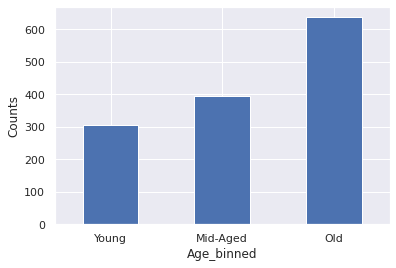

In [14]:
plot = insurance['Age_bins'].value_counts().sort_index().plot.bar(rot=0, xlabel='Age_binned', ylabel ='Counts')

#### Checking Hypothesis: Comprobar que BMI va aumentando con la edad

$$
\quad\\
H_0 = \{\mu_{young} = \mu_{middle} = \mu_{old}\}
\quad\\
$$

Usamos ANOVA porque queremos comparar más de dos variables.

In [39]:
anova = stats.f_oneway(insurance['bmi'][insurance['Age_bins'] == 'Young'],
               insurance['bmi'][insurance['Age_bins'] == 'Mid-Aged'],
               insurance['bmi'][insurance['Age_bins'] == 'Old'])
anova

F_onewayResult(statistic=6.894035218091769, pvalue=0.0010503023799197928)


**Conclusiones ANOVA**

Podemos ver en los resultados de ANOVA que el pvalue es menor que 0.5, por lo tanto podemos descartar la $H_0$ de que todas las medias son iguales para todos los intervalos.

Vamos a calcular los intervalos de confianza de cada grupo para demostrarlo.

#### Cálculo del intervalo de BMI para gente joven

In [15]:
insurance_age_young = insurance[insurance.Age_bins == 'Young']
confidence_interval(insurance_age_young.bmi)

The confidence interval for males is  [29.29960019 30.71510569]
Rounded to 4 digits: [29.3, 30.72]


#### Cálculo del intervalo de BMI para middle-aged

In [16]:
insurance_age_middle = insurance[insurance.Age_bins == 'Mid-Aged']
confidence_interval(insurance_age_middle.bmi)

The confidence interval for males is  [29.52477121 30.73859588]
Rounded to 4 digits: [29.52, 30.74]


#### Cálculo del intervalo de BMI para old people

In [17]:
insurance_age_old = insurance[insurance.Age_bins == 'Old']
confidence_interval(insurance_age_old.bmi)

The confidence interval for males is  [30.85028966 31.76622525]
Rounded to 4 digits: [30.85, 31.77]


### Conclusiones del intervalo de confianza para la variable BMI
While your BMI can give you an indication as to whether you’re at a healthy weight for your height, it’s far from perfect. BMI calculations and charts don’t adjust for your gender, age, race, ethnicity and other factors, which can impact your body fat and muscle—and therefore skew your BMI higher or lower. For example, research shows that the risk of diabetes is higher among Asians, Blacks and Hispanics than whites, even after taking into account BMI differences[[1](https://diabetesjournals.org/care/article/29/7/1585/28623/Ethnicity-Obesity-and-Risk-of-Type-2-Diabetes-in)].

BMI is a tool that helps determine whether you’re at a healthy weight in relation to your height—but “tool” is the operative word. While it’s designed to estimate whether you have excess or inadequate body fat, it does not measure fat directly—therefore it does not provide the whole picture for some people.

That’s why BMI alone should not be the only factor considered when gauging if you’re at a healthy weight. “It’s a base assessment,” says Jamie Feit, a registered dietitian at Testing.com, which offers at-home and lab testing information and resources. Other factors to consider include your age, gender, weight distribution, family medical history and lifestyle.

Adolphe Quetelet, a mathematician, first developed BMI and named it decades ago—it was first cited in 1972 in the Journal of Chronic Diseases. Quetelet developed the height-to-weight equation as a way to help determine an ideal weight for populations in general, not necessarily for individuals.

But because BMI is an accessible—albeit impercise—tool, it’s been adopted by the healthcare community and scientific researchers as a way of indicating the relative amount of body fat on a person’s body frame, and assessing if a person is at a healthy weight for their height.

While BMI doesn’t directly measure body fat, per se, it can give you and your healthcare provider an indication of whether you carry excess body fat, which in turn puts you at greater risk for type 2 diabetes, heart disease, high blood pressure and some cancers. However, having a BMI that’s too low poses other health problems, such as malnutrition and low bone density.

<img src='./fig/BMI_Graph.jpg'>


## Variable Charges

#### Checking Hypothesis: Difference in cost (charges) mean by gender test.
Vamos a comenzar proponiendo la siguiente hipótesis alternativa, teniendo en cuenta la hipótesis nula:

$$H_0:\{\mu_{female} > \mu_{male}\}$$
$$H_A:\{\mu_{female} \leq \mu_{male}\}$$

In [34]:
stats.ttest_ind(a=insurance_females.charges, b=insurance_males.charges, equal_var=False, alternative='less')

Ttest_indResult(statistic=-2.1008878232359565, pvalue=0.017920507478008323)

Como el pvalue es menor que 0.05, al estar calculandolo con un intervalo de confianza del 95%, para rechazar la hipótesis nula, dicho valor deberá ser menor. Como esto se cumple, podemos rechazar la hipótesis nula.

A continuación, vamos a calcular los intervalos de confianza para cada uno de los datasets, para comprobar que nuestro resultado y la decisión de rechazar $H_0$ tiene sentido.

### Cálculo del intervalo en toda la población

In [18]:
confidence_interval(insurance.charges)

The confidence interval for males is  [12621.54197823 13919.30255205]
Rounded to 4 digits: [1.262e+04, 1.392e+04]


### Cálculo del intervalo para hombres

In [19]:
confidence_interval(insurance_males.charges)

The confidence interval for males is  [12978.95334557 14934.54900988]
Rounded to 4 digits: [1.298e+04, 1.493e+04]


### Cálculo del intervalo para hombres

In [20]:
confidence_interval(insurance_females.charges)

The confidence interval for males is  [11721.83688351 13417.32080417]
Rounded to 4 digits: [1.172e+04, 1.342e+04]


### Cálculo de Charges por edades

#### Checking Hypothesis: Comprobar que los cargos van aumentando con la edad

$$
\quad\\
H_0 = \{\mu_{young} = \mu_{middle} = \mu_{old}\}
\quad\\
$$

Usamos ANOVA porque queremos comparar más de dos variables.

In [42]:
anova = stats.f_oneway(insurance['charges'][insurance['Age_bins'] == 'Young'],
               insurance['charges'][insurance['Age_bins'] == 'Mid-Aged'],
               insurance['charges'][insurance['Age_bins'] == 'Old'])
anova

F_onewayResult(statistic=52.91836477005623, pvalue=7.645137051605051e-23)

**Conclusiones ANOVA**

Podemos ver en los resultados de ANOVA que el pvalue es mucho menor que 0.5, por lo tanto podemos descartar la $H_0$ de que todas las medias son iguales para todos los intervalos de edad.

Vamos a calcular los intervalos de confianza de cada grupo para demostrarlo.

#### Cálculo de cargos para gente joven

In [21]:
confidence_interval(insurance_age_young.charges)

The confidence interval for males is  [ 7769.74453221 10404.28708164]
Rounded to 4 digits: [7.77e+03, 1.04e+04]


#### Cálculo de cargos para middle-aged

In [22]:
confidence_interval(insurance_age_middle.charges)

The confidence interval for males is  [ 9973.90890945 12219.45107941]
Rounded to 4 digits: [9.974e+03, 1.222e+04]


#### Cálculo de cargos para gente mayor

In [23]:
confidence_interval(insurance_age_old.charges)

The confidence interval for males is  [15712.20183784 17543.7151356 ]
Rounded to 4 digits: [1.571e+04, 1.754e+04]


### Cálculo de charges por BMI

In [24]:
# En primer lugar, dividimos el dataset 
BMI_nodes = [0,18.5,25,30,100]
insurance['BMI_bins'] = pd.cut(insurance['bmi'], bins=BMI_nodes, ordered=True, labels=['Underweight','Normal', 'Overweight', 'Obesity'])

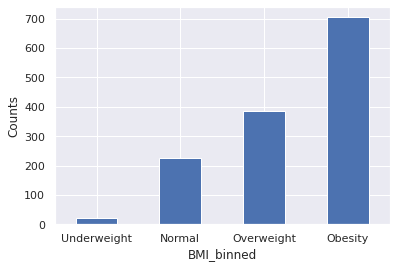

In [25]:
plot = insurance['BMI_bins'].value_counts().sort_index().plot.bar(rot=0, xlabel='BMI_binned', ylabel ='Counts')

#### Checking Hypothesis: Comprobar que los cargos van aumentando en función del BMI

$$
\quad\\
H_0 = \{\mu_{Underweight} = \mu_{normal} = \mu_{overweight}\ = \mu_{obesity}\}
\quad\\
$$

Usamos ANOVA porque queremos comparar más de dos variables.

In [43]:
anova = stats.f_oneway(insurance['charges'][insurance['BMI_bins'] == 'Underweight'],
               insurance['charges'][insurance['BMI_bins'] == 'Normal'],
               insurance['charges'][insurance['BMI_bins'] == 'Overweight'],
               insurance['charges'][insurance['BMI_bins'] == 'Obesity'])
anova

F_onewayResult(statistic=18.80499193254325, pvalue=5.997613229094973e-12)

**Conclusiones ANOVA**

Podemos ver en los resultados de ANOVA que el pvalue es mucho menor que 0.5, por lo tanto podemos descartar la $H_0$ de que todas las medias son iguales para todos los intervalos de BMI.

Vamos a calcular los intervalos de confianza de cada grupo para demostrarlo.

#### Cálculo de charges para BMI = Underweight

In [26]:
insurance_bmi_under = insurance[insurance.BMI_bins == 'Underweight']
confidence_interval(insurance_bmi_under.charges)

The confidence interval for males is  [ 5410.64371885 11904.59758592]
Rounded to 4 digits: [5.411e+03, 1.19e+04]


#### Cálculo de charges para BMI = Normal

In [27]:
insurance_bmi_normal = insurance[insurance.BMI_bins == 'Normal']
confidence_interval(insurance_bmi_normal.charges)

The confidence interval for males is  [ 9459.65852482 11411.22291341]
Rounded to 4 digits: [9.46e+03, 1.141e+04]


#### Cálculo de charges para BMI = Overweight

In [28]:
insurance_bmi_over = insurance[insurance.BMI_bins == 'Overweight']
confidence_interval(insurance_bmi_over.charges)

The confidence interval for males is  [10193.01831487 11802.58944704]
Rounded to 4 digits: [1.019e+04, 1.18e+04]


#### Cálculo de charges para BMI = Obese

In [29]:
insurance_bmi_obesity = insurance[insurance.BMI_bins == 'Obesity']
confidence_interval(insurance_bmi_obesity.charges)

The confidence interval for males is  [14485.93218569 16635.92045683]
Rounded to 4 digits: [1.449e+04, 1.664e+04]


### Cálculo de charges por Smoke
Vamos a comenzar proponiendo la siguiente hipótesis alternativa, teniendo en cuenta la hipótesis nula:

$$H_0:\{\mu_{nonSmoker} > \mu_{smoker}\}$$
$$H_A:\{\mu_{nonSmoker} \leq \mu_{smoker}\}$$

In [49]:
insurance_smoker = insurance[insurance.smoker == 'yes']
insurance_nonSmoker = insurance[insurance.smoker == 'no']
stats.ttest_ind(a=insurance_nonSmoker.charges, b=insurance_smoker.charges, equal_var=False, alternative='less')

Ttest_indResult(statistic=-32.751887766341824, pvalue=2.94473222335849e-103)

Como el pvalue es menor que 0.05, al estar calculandolo con un intervalo de confianza del 95%, para rechazar la hipótesis nula, dicho valor deberá ser menor. Como esto se cumple, podemos rechazar la hipótesis nula.

A continuación, vamos a calcular los intervalos de confianza para cada uno de los datasets, para comprobar que nuestro resultado y la decisión de rechazar $H_0$ tiene sentido.

In [50]:
confidence_interval(insurance_smoker.charges)

The confidence interval for males is  [30683.64622989 33416.81743318]
Rounded to 4 digits: [3.068e+04, 3.342e+04]


In [51]:
confidence_interval(insurance_nonSmoker.charges)

The confidence interval for males is  [8074.12262003 8794.41397569]
Rounded to 4 digits: [8.074e+03, 8.794e+03]


**Conclusiones de la variable Smoker**
Podemos ver que a los fumadores les cobran entre 30K y 33K mientras que a los no fumadores les cobran entre 8K y 8.7K.

# Bibliography

[1] "Global status report on noncommunicable diseases 2014". World Health Organization